<a href="https://colab.research.google.com/github/luiesa/pygame/blob/1.9.6-python3.8/AI-Predict_Stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#Description: This programm users an artificial recurrent neural network called Long Short Term Memory (LSTM) 
#             to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price. 

#Import the librayies
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2021-05-14')
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.510078
...,...,...,...,...,...,...
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997


In [56]:
#Get the number of rows and columns in the data set
df.shape

(5383, 6)

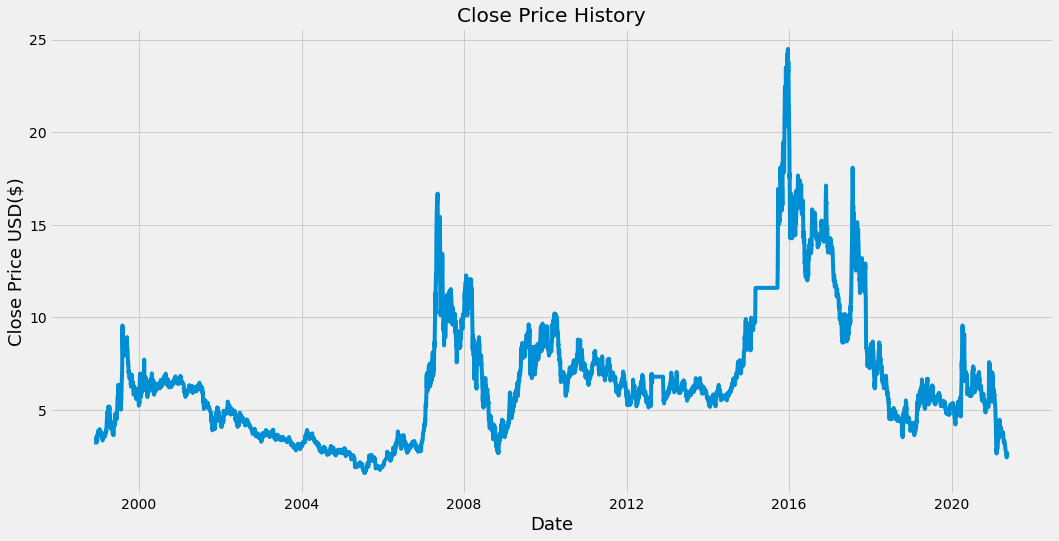

In [57]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()



In [58]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len


4307

In [59]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.06740527],
       [0.0810588 ],
       [0.07854366],
       ...,
       [0.04791123],
       [0.04922024],
       [0.05140193]])

In [60]:
#Create the training data set
#Create the scaled training date set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0]) 
  if i <= 61:
    print(x_train)
    print(y_train)
    print()



[array([0.06740527, 0.0810588 , 0.07854366, 0.0857297 , 0.08231636,
       0.07926226, 0.07333379, 0.07495064, 0.08932277, 0.08878381,
       0.09129894, 0.09129894, 0.09417336, 0.08932277, 0.09938323,
       0.09650882, 0.09704778, 0.10171873, 0.09902395, 0.09453264,
       0.09884427, 0.09920359, 0.10351522, 0.10243733, 0.09740706,
       0.09489197, 0.09561057, 0.09704778, 0.09327507, 0.09704778,
       0.09291579, 0.08950241, 0.0873466 , 0.09004137, 0.09632917,
       0.0936344 , 0.08770588, 0.09183786, 0.08770588, 0.08590939,
       0.07962159, 0.07692681, 0.0810588 , 0.08680763, 0.08716696,
       0.08770588, 0.09399368, 0.09543089, 0.09561057, 0.09812567,
       0.09525125, 0.10028148, 0.09758674, 0.11429433, 0.11968389,
       0.1225583 , 0.12094141, 0.1399845 , 0.13800832, 0.14519437])]
[0.1326187679341652]

[array([0.06740527, 0.0810588 , 0.07854366, 0.0857297 , 0.08231636,
       0.07926226, 0.07333379, 0.07495064, 0.08932277, 0.08878381,
       0.09129894, 0.09129894, 0.094

In [61]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [62]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4247, 60, 1)

In [63]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [64]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [65]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4247/4247 [==============================] - 116s 27ms/step - loss: 0.0013


In [66]:
#Create the testing data set
#Create a new array containing scaled values from index 1824 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [67]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [68]:
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [69]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [70]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse  

0.2988884406905192

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'high right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


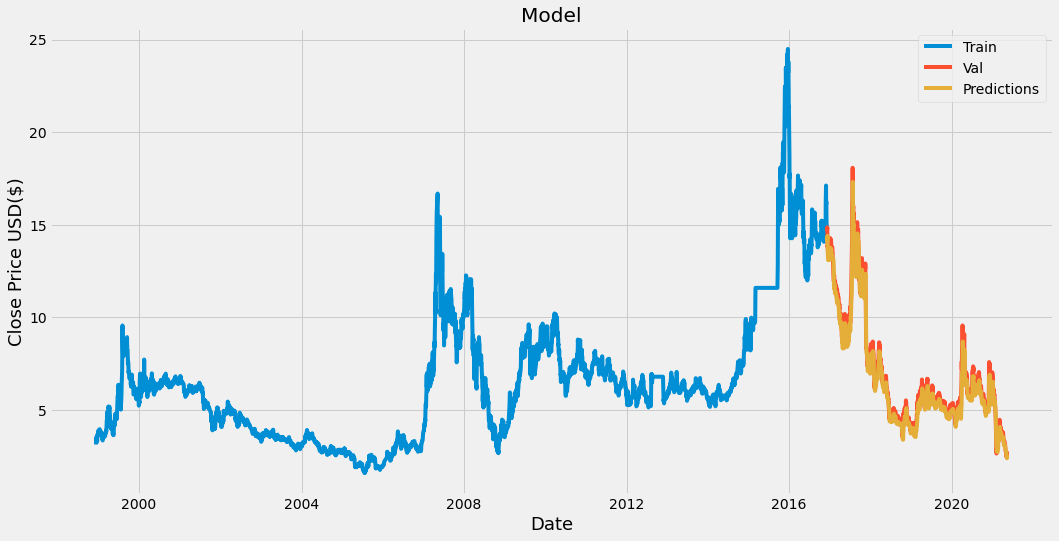

In [74]:
#Plot the data
train  = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='high right')
plt.show()


In [75]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2016-12-07,14.79,14.071678
2016-12-08,14.74,14.161497
2016-12-09,14.85,14.265212
2016-12-12,13.79,14.391334
2016-12-13,13.87,13.800806
...,...,...
2021-05-10,2.42,2.507496
2021-05-11,2.54,2.394403
2021-05-12,2.67,2.377354


In [76]:
#Get the quote 
apple_quote = web.DataReader('600191.SS', data_source='yahoo', start='1998-12-10', end='2021-05-14')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Vonvert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Get the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[[2.5580049]]


In [ ]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-05-13', end='2021-05-13')
print(apple_quote2['Close'])


Date
2021-05-13    124.970001
Name: Close, dtype: float64
